In [18]:
# Импортируем модули и библиотеки
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [3]:
# Делим наш датасет на обучающую и тестовую выборку
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11501568/11490434 [==============================] - 0s 0us/step


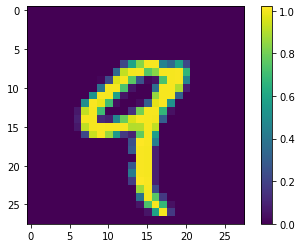

In [4]:
# Предворительная обработка данных
# Нормализация данных
x_train = x_train / 250
x_test = x_test / 250

# Проверка на работу нормализованных данных
plt.figure()
plt.imshow(x_train[4])
plt.colorbar()
plt.grid(False)

In [5]:
# Создание модели нейронной сети
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(820, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [6]:
# Компиляция модели
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1439 - accuracy: 0.9611
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1355 - accuracy: 0.9634
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1276 - accuracy: 0.9658
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1209 - accuracy: 0.9671
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1146 - accuracy: 0.9689
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1091 - accuracy: 0.9707
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1039 - accuracy: 0.9724
Epoch 8/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0992 - accuracy: 0.9740
Epoch 9/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0948 - accuracy: 0.9750
Epoch 10/15
1875/1875 [==============================] - 10s 5ms/step - lo

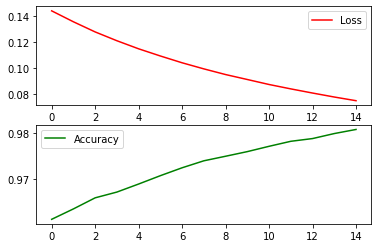

In [41]:
model_history = pd.DataFrame(history.history)

plt.figure()

plt.subplot(2, 1, 1)
plt.plot(model_history.index , model_history.loss, label='Loss', color="r")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(model_history.index , model_history.accuracy, label='Accuracy', color="g")
plt.legend()
plt.show()

In [42]:
# Тестирование натренировоной модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'loss: {str(test_loss)[:6]} - accuracy: {str(test_acc)[:6]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0916 - accuracy: 0.9733
loss: 0.0915 - accuracy: 0.9732


In [43]:
# Предсказываем
predictions = model.predict(x_test)

Text(0.5, 1.0, '5.000000')

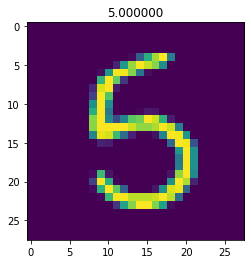

In [44]:
index = 3678

plt.imshow(x_test[index])
plt.title("%f" % np.argmax(predictions[index]))

In [45]:
model.save("mnist.h5")